<h1 style="text-align: center;">Lending Club Project</h1>

## The Data

This project used a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out to borrowers with information on whether or not the borrower defaulted (charge-off), the goal is to build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

### Data Overview

----
-----
Below is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Creating Feature Description 

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  


# Exploratory Data Analysis

### The countplot below shows the total number of people who repaid their loans. Among the 396,030 borrowers we have, 318,357 (80.3%) borrowers repaid their loans while about 77,673(19.6%) borrowers didn't repay their loans

In [9]:
df.shape

(396030, 27)

In [10]:
repayers = df.groupby('loan_status')[['loan_status']].count().T

In [11]:
n_repayers = repayers.reset_index()[['Charged Off','Fully Paid']]

In [12]:
c_percent = (n_repayers['Charged Off']/(n_repayers['Fully Paid']+n_repayers['Charged Off']))*100
f_percent = (n_repayers['Fully Paid']/(n_repayers['Fully Paid']+n_repayers['Charged Off']))*100

In [13]:
c_percent

0    19.612908
dtype: float64

In [14]:
f_percent

0    80.387092
dtype: float64

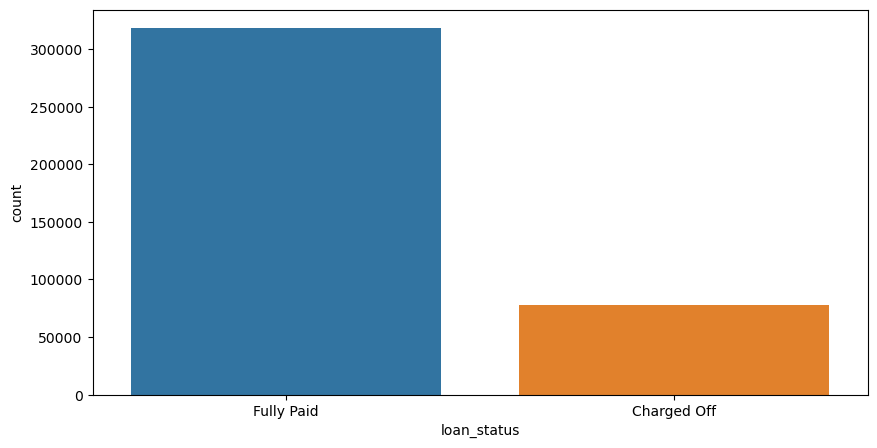

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='loan_status');

### The histogram below shows that the most amount of loan being borrowed is between 5000 and 15000 with over 200,000 occurrences

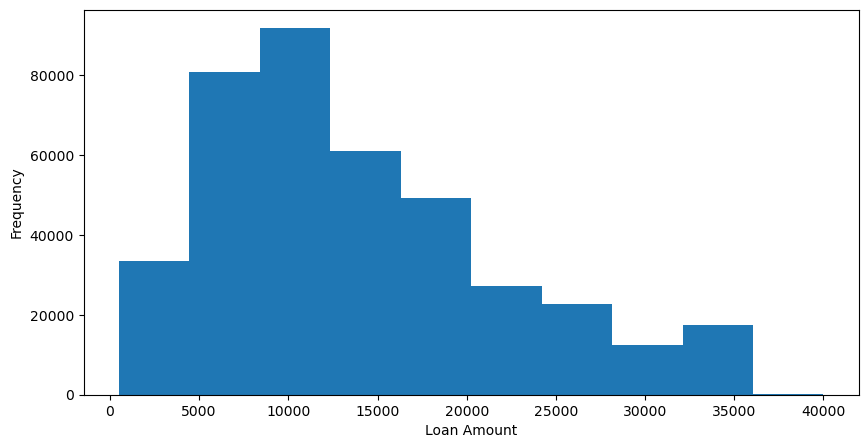

In [16]:
plt.figure(figsize=(10,5))
df['loan_amnt'].plot(kind='hist')
plt.xlabel('Loan Amount');

In [17]:
# Creating the histogram with Seaborn and Plotly isn't as beautiful as creating it with Matplotlib
# px.histogram(data_frame=df,x='loan_amnt')

**A correlation between all the variables in the dataset** 

In [18]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**A heatmap of the previous correlation**

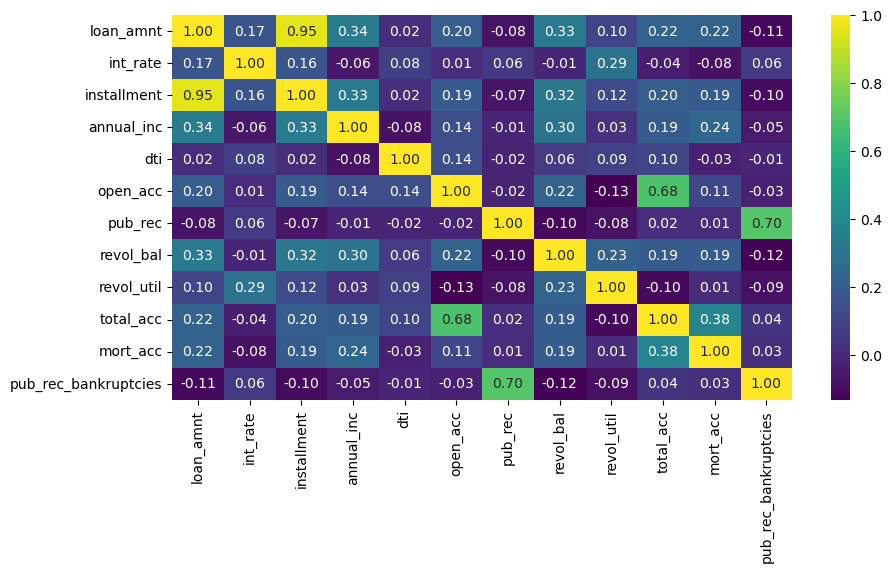

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='viridis');

**There was a near perfect correlation (0.95) between loan amount and installment. The scatterplot below was plotted to visualise this relationship**

In [20]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [21]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


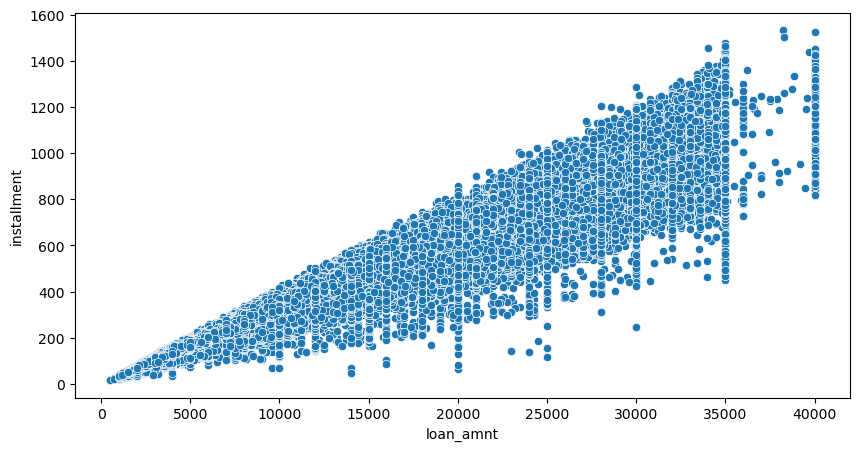

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='loan_amnt',y='installment');

**Visualising the relationship between pub_rec and pub_rec_bankruptcies (0.70)**

In [23]:
feat_info('pub_rec')

Number of derogatory public records


In [24]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


**The Visualisation below shows that the average derogatory public records is highly correlated to the number of public record bankruptcies**

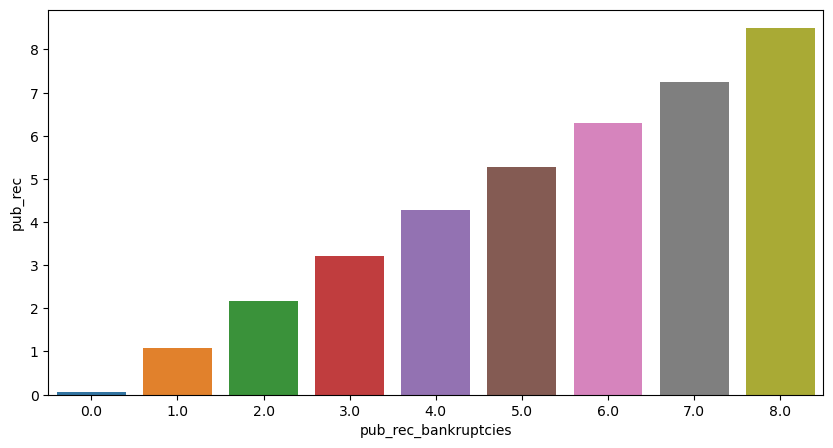

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,y='pub_rec',x='pub_rec_bankruptcies',errorbar=None);

**Visualising the relationship between total_acc and open_acc (0.68)**

In [26]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [27]:
feat_info('open_acc')

The number of open credit lines in the borrower's credit file.


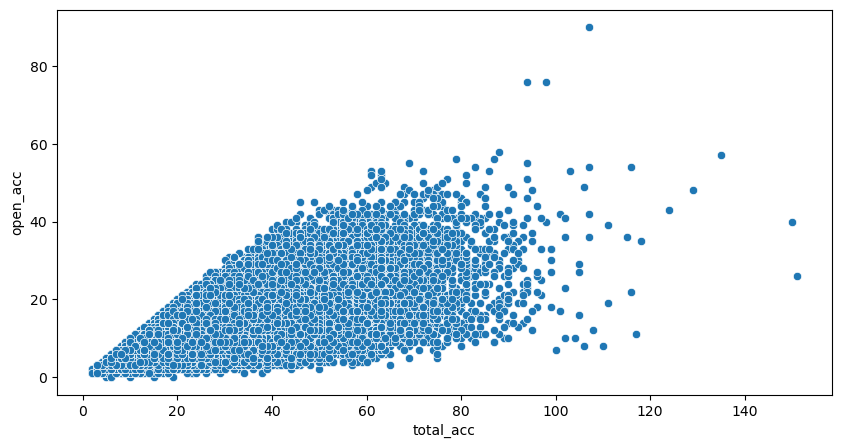

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='total_acc',y='open_acc');

**This shows that the amount being borrowed by people who fully paid and those who didn't fully paid have around the same average**

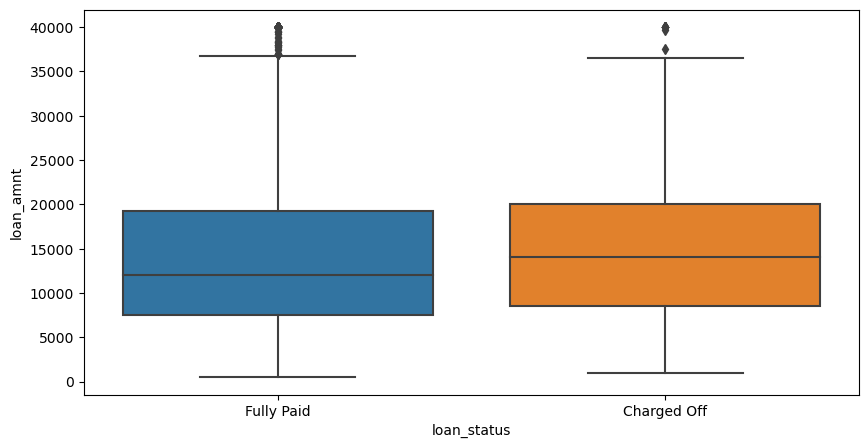

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='loan_status',y='loan_amnt');

**Some extra statistics about the loan amount grouped by loan status**

In [30]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**The list of unique grades given to each individual loans**

In [31]:
sorted_grades1 = df['grade'].unique().tolist()
sorted_grades1.sort()
print(sorted_grades1)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


**The list of unique subgrades given to each individual loans**

In [32]:
sorted_grades2 = df['sub_grade'].unique().tolist()
sorted_grades2.sort()
print(sorted_grades2)

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**The countplot below shows that majority of the loan being taken are B grade. The people who are most likely not to pay their loans are those with the a LC loan grade of F & G**

In [33]:
feat_info('grade')

LC assigned loan grade


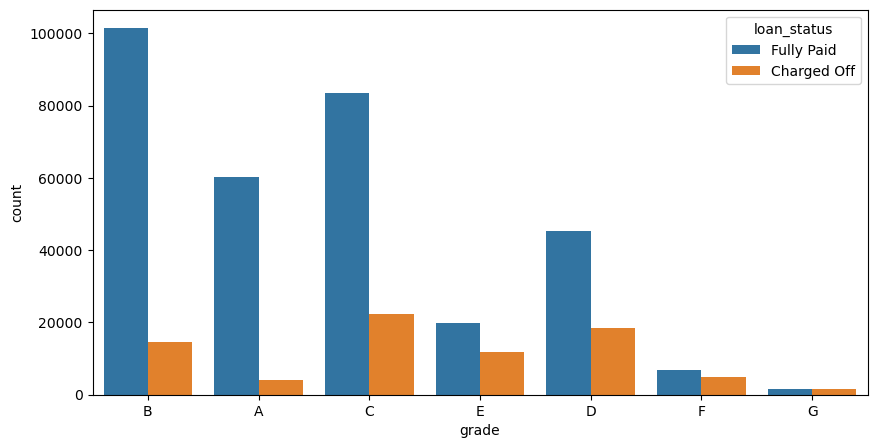

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='grade',hue='loan_status');

**These are the subgrades of people who take loans at LC. The Category of people who take the most loans are the B3 category**

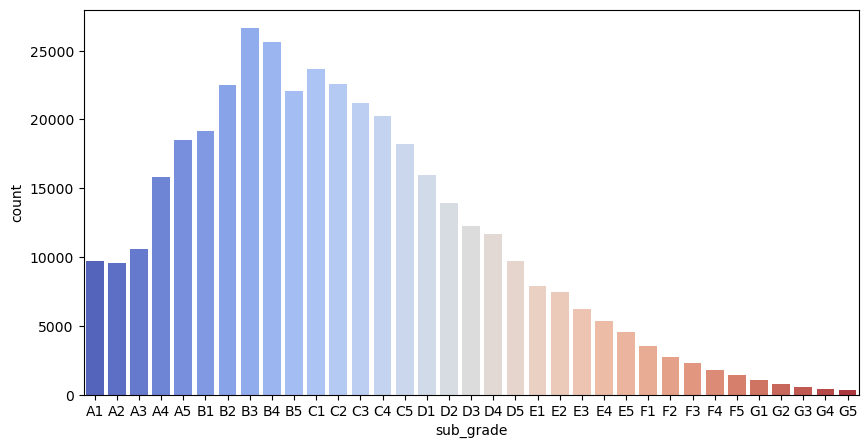

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='sub_grade',order=sorted_grades2,palette='coolwarm');

**The loan subcategory of people who mostly do not repay their loans are the C groups [C1,C2,C3,C4,C5]**

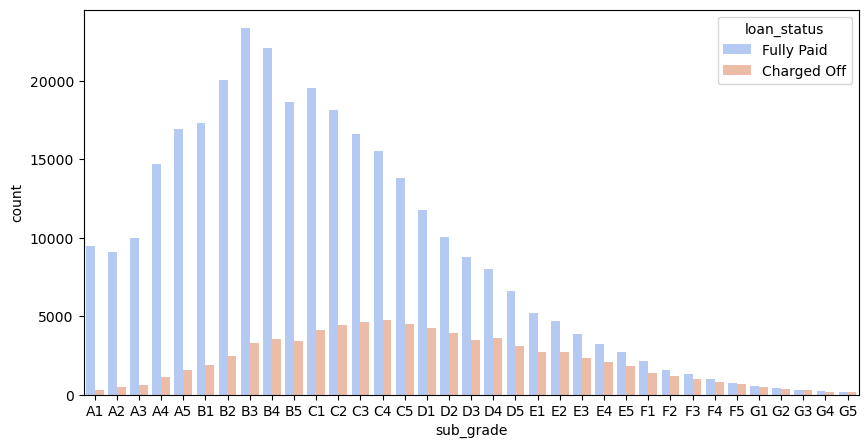

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='sub_grade',order=sorted_grades2,palette='coolwarm',hue='loan_status');

**The loan repaid and loan charged off for the F&G sub categories are very close to each other. I zoomed into those 2 sub categories in the chart below. Except Lending club just want to keep dashing out money I recommend that they give out loans to the F&G category of loans**

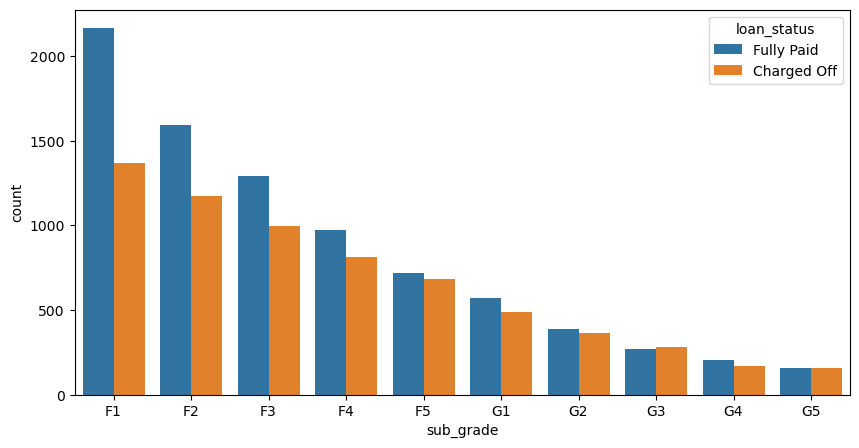

In [37]:
plt.figure(figsize=(10,5))
fg = df[(df['sub_grade'].str.contains('F'))|(df['sub_grade'].str.contains('G'))]
sns.countplot(data=fg,x='sub_grade',order=['F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],hue='loan_status');

**Created a new column called 'loan_repaid' which contains 1 if the loan status is "Fully Paid" and 0 if it is "Charged Off".**

In [38]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [39]:
df[['loan_repaid','loan_status']].head(3)

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid


**This is a bar plot showing the correlation of the numeric features to the new loan_repaid column**

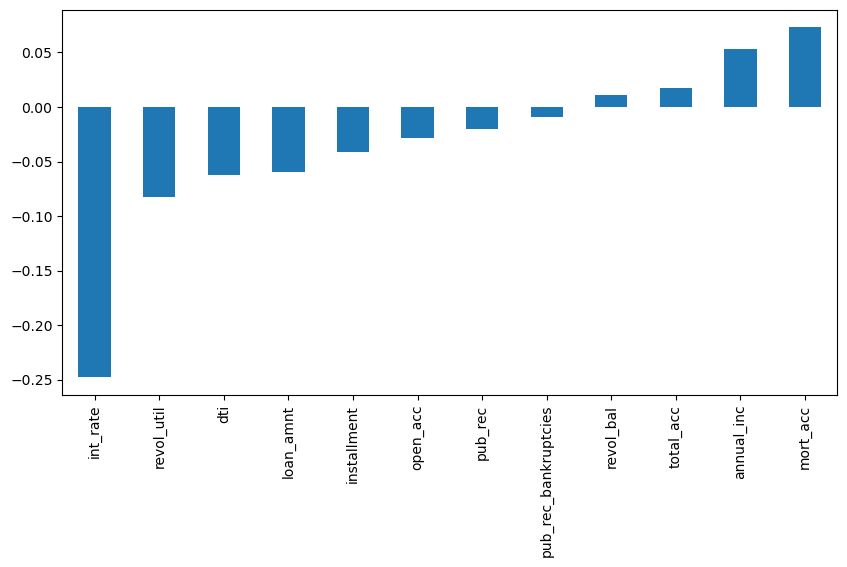

In [40]:
plt.figure(figsize=(10,5))
df.corr(numeric_only=True)['loan_repaid'].sort_values(ascending=True)[:-1].plot(kind='bar');

---
---
# Data PreProcessing

**Removing and filling missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**


In [41]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


# Missing Data

**A confirmation that the columns identified to have missing values actually contain missing values**

In [42]:
missing_variables = df[['emp_title','emp_length','title','revol_util','mort_acc','pub_rec_bankruptcies']]
missing_variables[missing_variables==''].head()

,emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


**Total number of rows in the dataset**

In [43]:
df.shape[0]

396030

**Count of missing values per column**

In [44]:
non_na = df.isna().sum()
non_na[non_na!=0]

emp_title               22927
emp_length              18301
title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**Count of missing values as percentage of the total DataFrame**

In [45]:
non_na = (df.isna().sum()/df.shape[0])*100
non_na[non_na!=0]

emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

**An examination of the emp_title and emp_length to see whether it will be okay to drop them**

In [46]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Unique employment job titles**

In [47]:
df['emp_title'].nunique()

173105

In [48]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert to a dummy variable feature. I will go ahead and remove the emp_title column.**

In [49]:
df=df.drop('emp_title',axis=1)

**List of unique employment length values.**

In [50]:
df[df['emp_length'].notna()]['emp_length'].unique().tolist()

['10+ years',
 '4 years',
 '< 1 year',
 '6 years',
 '9 years',
 '2 years',
 '3 years',
 '8 years',
 '7 years',
 '5 years',
 '1 year']

**Count plot of the emp_length feature column**

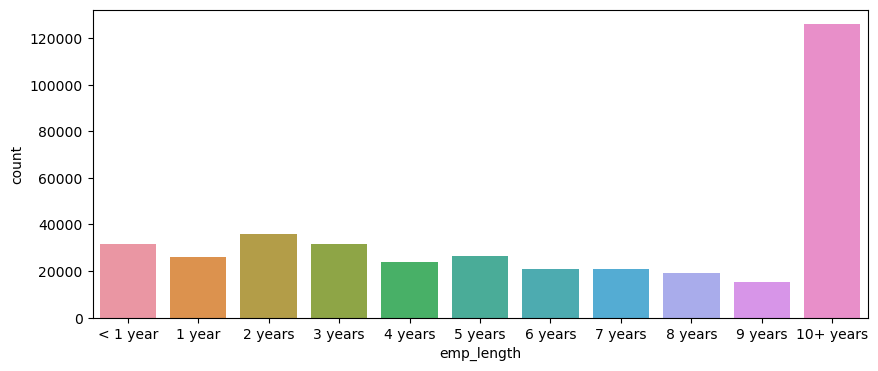

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',order =['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']);

**Count plot of the emp_length feature column categorised by loan status**

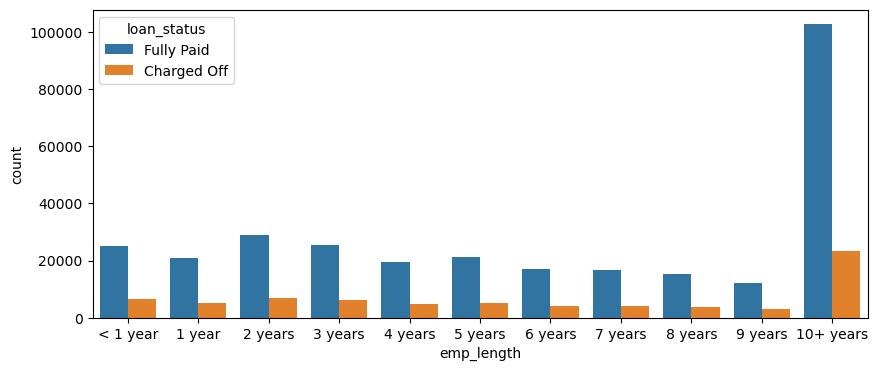

In [52]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length',hue='loan_status',order =['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']);

**The section below was to get what percentage of each employment length category is being charged off (not repaid). After the analysis I discovered they were around the same percentage. Therefore, no matter the employment length about 19% of each employment length won't pay back their loans**

In [53]:
employment_length = df[df['emp_length'].notna()]

In [54]:
el_df = employment_length.groupby(['emp_length','loan_status'])['emp_length'].count()

In [55]:
el_df.name = 'employment length'

In [56]:
el_dff = el_df.reset_index()

In [57]:
pivot_eldff = el_dff.pivot_table(values='employment length',index='emp_length',columns='loan_status')

In [58]:
pivot_eldff['Total'] = pivot_eldff['Charged Off']+pivot_eldff['Fully Paid']

In [59]:
pivot_eldff['%charged Off']= (pivot_eldff['Charged Off']/pivot_eldff['Total'])*100

In [60]:
pivot_eldff

loan_status,Charged Off,Fully Paid,Total,%charged Off
emp_length,,,,
1 year,5154,20728,25882,19.913453
10+ years,23215,102826,126041,18.418610
2 years,6924,28903,35827,19.326206
3 years,6182,25483,31665,19.523133
4 years,4608,19344,23952,19.238477
5 years,5092,21403,26495,19.218721
6 years,3943,16898,20841,18.919438
7 years,4055,16764,20819,19.477400
8 years,3829,15339,19168,19.976002


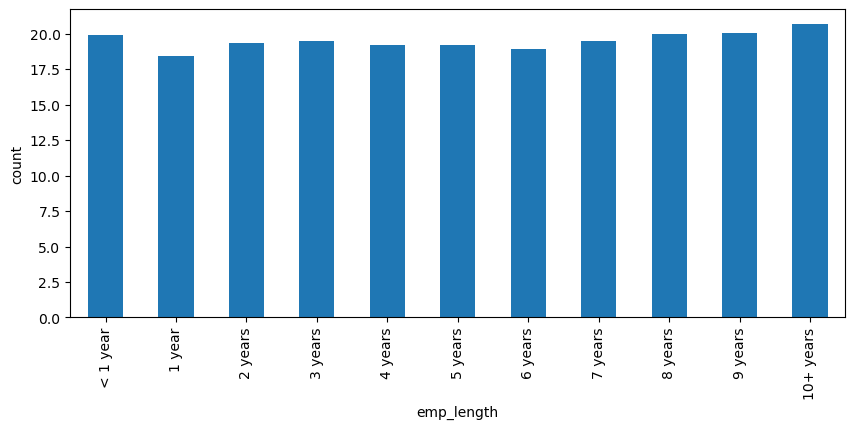

In [61]:
plt.figure(figsize=(10,4))
pivot_eldff['%charged Off'].plot(kind='bar')
x_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
plt.xticks(range(len(x_order)),x_order)
plt.ylabel('count')
plt.show()

**Because charge off rates are extremely similar across all employment lengths I will go ahead and drop the emp_length column.**

In [62]:
df = df.drop('emp_length',axis=1)

In [63]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**Columns that still have missing data.**

In [64]:
non_na = df.isna().sum()
non_na[non_na!=0]

title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**The title column is a subcategory of the purpose column.**

In [65]:
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


**I am dropping the title column because the purpose column is complete and contains the exact information being given by the title column.**

In [66]:
df=df.drop('title',axis=1)

**Columns that still have missing data.**

In [67]:
non_na = df.isna().sum()
non_na[non_na!=0]

revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**Dealing with missing values in the mort_acc column**

In [68]:
feat_info('mort_acc')

Number of mortgage accounts.


**Seeing if the categories can used**

In [69]:
df['mort_acc'].value_counts().head()

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
Name: mort_acc, dtype: int64

**A check to see which column is most correlated to mort_acc**

In [70]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**The most correlated column with mort_acc is total_acc column. In the cells below I grouped the mort_acc by the total_acc feature**

In [71]:
mort_ser = df.groupby('total_acc')['mort_acc'].mean()

In [72]:
mort_ser.head()

total_acc
2.0    0.000000
3.0    0.052023
4.0    0.066743
5.0    0.103289
6.0    0.151293
Name: mort_acc, dtype: float64

**I filled in the mort_acc feature based on the average of the total_acc feature**

In [73]:
df['mort_acc'] = df.apply(lambda row: mort_ser[row['total_acc']] if pd.isna(row['mort_acc']) else row['mort_acc'], axis=1)

**Columns that still have missing data.**

In [74]:
non_na = df.isna().sum()
non_na[non_na!=0]

revol_util              276
pub_rec_bankruptcies    535
dtype: int64

**There are two columns left revol_util and pub_rec_bankruptcies.**

In [75]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [76]:
non_na = (df.isna().sum()/df.shape[0])*100
non_na[non_na!=0]

revol_util              0.069692
pub_rec_bankruptcies    0.135091
dtype: float64

**The NaN value in revol_util accounts for less than 0.5% of the dataset so they can be removed**

In [77]:
df.dropna(subset=['revol_util'],inplace=True)

**Count of missing values in the DataFrame**

In [78]:
non_na = df.isna().sum()
non_na[non_na!=0]

pub_rec_bankruptcies    535
dtype: int64

**Count of missing values as percentage of the total DataFrame**

In [79]:
non_na = (df.isna().sum()/df.shape[0])*100
non_na[non_na!=0]

pub_rec_bankruptcies    0.135185
dtype: float64

**The NaN value in pub_rec_bankruptcies accounts for less than 0.5% of the dataset so they can be removed**

In [80]:
df.dropna(subset=['pub_rec_bankruptcies'],inplace=True)

In [81]:
non_na = (df.isna().sum()/df.shape[0])*100
non_na[non_na!=0]

Series([], dtype: float64)

## Categorical Variables and Dummy Variables

In [82]:
g = df.columns.to_series().groupby(df.dtypes).groups

In [83]:
g

{int64: ['loan_repaid'], float64: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'], object: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [84]:
g1 = {k.name: v for k, v in g.items()}

In [85]:
print(g1['object'])

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')


In [86]:
df.select_dtypes(include=['object']).head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


---
---


### Term feature

**Term grade was converted into a dummy variable**

In [87]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [88]:
df['term'] = df['term'].map({' 36 months':0,' 60 months':1})

In [112]:
df['term'].head()

0    0
1    0
2    0
3    0
4    1
Name: term, dtype: int64

### Grade feature

**SInce grade is part of sub_grade, I will just drop the grade feature.**

In [114]:
df.drop('grade',axis=1,inplace=True)

In [117]:
df.select_dtypes(include=['object']).head()

,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


**The sub_grade column is being converted into a dummy variable in the cells belows**

In [121]:
df = pd.concat([df,pd.get_dummies(df['sub_grade'],drop_first=True)],axis=1)

In [123]:
df.drop('sub_grade',axis=1,inplace=True)

In [125]:
df.select_dtypes(include=['object']).head()

,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


**'verification_status', 'application_type','initial_list_status','purpose' was converted into dummy variables in the cells below**

In [128]:
df = pd.concat([df,pd.get_dummies(df['verification_status'],drop_first=True)],axis=1)

In [131]:
df = pd.concat([df,pd.get_dummies(df['application_type'],drop_first=True)],axis=1)

In [133]:
df = pd.concat([df,pd.get_dummies(df['initial_list_status'],drop_first=True)],axis=1)

In [135]:
df = pd.concat([df,pd.get_dummies(df['purpose'],drop_first=True)],axis=1)

In [136]:
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [138]:
df.select_dtypes(include=['object']).head()

,home_ownership,issue_d,loan_status,earliest_cr_line,address
0,RENT,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,MORTGAGE,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,RENT,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,RENT,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,MORTGAGE,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


### home_ownership
**Unique counts of the home_ownership column.**

In [139]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [140]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**NONE and ANY are very insignificant therefore I joined it together with OTHER and extracted dummies from the home_ownership column**

In [146]:
df['home_ownership'] = df['home_ownership'].map({'RENT':'RENT', 'MORTGAGE':'MORTGAGE', 'OWN':'OWN', 'OTHER':'OTHER', 'ANY':'OTHER', 'NONE':'OTHER'})

In [147]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [148]:
df = pd.concat([df,pd.get_dummies(df['home_ownership'],drop_first=True)],axis=1)

In [150]:
df.drop('home_ownership',axis=1,inplace=True)

In [151]:
df.select_dtypes(include=['object']).head()

,issue_d,loan_status,earliest_cr_line,address
0,Jan-2015,Fully Paid,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Jan-2015,Fully Paid,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Jan-2015,Fully Paid,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Nov-2014,Fully Paid,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Apr-2013,Charged Off,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


**I dropped loan_status feature because there is already a loan_repaid feature**

In [152]:
df.drop('loan_status',axis=1,inplace=True)

**I feature engineered a zip code column from the address column in the data set**

In [155]:
df.select_dtypes(include=['object']).head()

,issue_d,earliest_cr_line,address
0,Jan-2015,Jun-1990,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,Nov-2014,Sep-2006,"823 Reid Ford\nDelacruzside, MA 00813"
4,Apr-2013,Mar-1999,"679 Luna Roads\nGreggshire, VA 11650"


In [157]:
zip_code = df['address'].apply(lambda x: x[-5:])

In [159]:
df['zip_code'] = zip_code

**Turned zip_code column into a dummy variables and also dropped the original zip_code column along with the address column.**

In [160]:
df = pd.concat([df,pd.get_dummies(df['zip_code'],drop_first=True)],axis=1)

In [162]:
df.drop('address',axis=1,inplace=True)

In [164]:
df.drop('zip_code',axis=1,inplace=True)

In [165]:
df.select_dtypes(include=['object']).head()

,issue_d,earliest_cr_line
0,Jan-2015,Jun-1990
1,Jan-2015,Jul-2004
2,Jan-2015,Aug-2007
3,Nov-2014,Sep-2006
4,Apr-2013,Mar-1999


**Since we wouldn't know beforehand whether or not a loan would be issued when using our model, we wouldn't need the issue_d therefore I will remove this feature**

In [167]:
df.drop('issue_d',axis=1,inplace=True)

In [168]:
df.select_dtypes(include=['object']).head()

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999


**To ensure the model get the best feature to work with I extracted the year from the earliest_cr_line timestamp and converted it into a numeric datatype**

In [172]:
df['earliest_cr_year'] = pd.to_numeric(df['earliest_cr_line'].apply(lambda x:x[-4:]))

In [174]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [175]:
df.select_dtypes(include=['object']).head()

""
0
1
2
3
4


## Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

**TASK: Set X and y variables to the .values of the features and label.**

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,1,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,1,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,1,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [100]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [101]:
#CODE HERE

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [102]:
# CODE HERE

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [104]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [105]:
# CODE HERE

**TASK: OPTIONAL: Save your model.**

In [106]:
# CODE HERE

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [107]:
# CODE HERE

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [108]:
# CODE HERE

**TASK: Given the customer below, would you offer this person a loan?**

In [109]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                                                         25000.0
term                                                                    1
int_rate                                                            18.24
installment                                                        638.11
grade                                                                   D
sub_grade                                                              D5
home_ownership                                                       RENT
annual_inc                                                        61665.0
verification_status                                              Verified
issue_d                                                          Sep-2014
loan_status                                                    Fully Paid
purpose                                                debt_consolidation
dti                                                                 30.11
earliest_cr_line                      

In [110]:
# CODE HERE

**TASK: Now check, did this person actually end up paying back their loan?**

In [111]:
# CODE HERE

# GREAT JOB!